RAG ARCHITECTURE

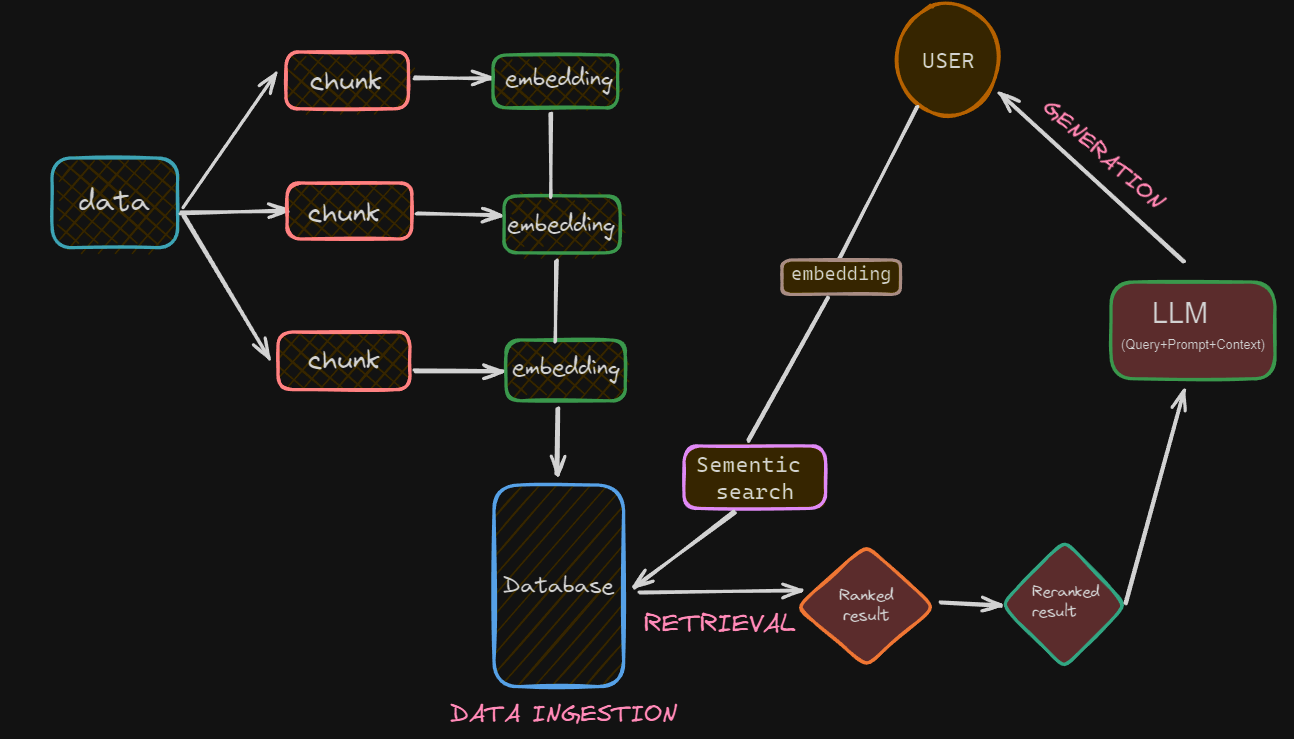

In [1]:
corpus_of_documents = [
    "Take a leisurely walk in the park and enjoy the fresh air.",
    "Visit a local museum and discover something new.",
    "Attend a live music concert and feel the rhythm.",
    "Go for a hike and admire the natural scenery.",
    "Have a picnic with friends and share some laughs.",
    "Explore a new cuisine by dining at an ethnic restaurant.",
    "Take a yoga class and stretch your body and mind.",
    "Join a local sports league and enjoy some friendly competition.",
    "Attend a workshop or lecture on a topic you're interested in.",
    "Visit an amusement park and ride the roller coasters."
]

In [2]:
corpus_of_documents

['Take a leisurely walk in the park and enjoy the fresh air.',
 'Visit a local museum and discover something new.',
 'Attend a live music concert and feel the rhythm.',
 'Go for a hike and admire the natural scenery.',
 'Have a picnic with friends and share some laughs.',
 'Explore a new cuisine by dining at an ethnic restaurant.',
 'Take a yoga class and stretch your body and mind.',
 'Join a local sports league and enjoy some friendly competition.',
 "Attend a workshop or lecture on a topic you're interested in.",
 'Visit an amusement park and ride the roller coasters.']

In [3]:
user_query="i am an indian and i live in india"

In [4]:
document="india is a country for the indians and for everyone"

In [5]:
query_tokens=user_query.lower().split(" ")

In [6]:
query_tokens

['i', 'am', 'an', 'indian', 'and', 'i', 'live', 'in', 'india']

In [7]:
document_tokens=document.lower().split(" ")

In [8]:
document_tokens

['india',
 'is',
 'a',
 'country',
 'for',
 'the',
 'indians',
 'and',
 'for',
 'everyone']

In [9]:
from collections import Counter

In [10]:
query_counter=Counter(query_tokens)

In [11]:
query_counter

Counter({'i': 2,
         'am': 1,
         'an': 1,
         'indian': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'india': 1})

In [12]:
document_counter=Counter(document_tokens)

In [13]:
document_counter

Counter({'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'for': 2,
         'the': 1,
         'indians': 1,
         'and': 1,
         'everyone': 1})

In [14]:
document_embedding=[]
for token in document_counter.keys():
    document_embedding.append(document_counter[token])

In [15]:
document_embedding

[1, 1, 1, 1, 2, 1, 1, 1, 1]

In [16]:
user_query

'i am an indian and i live in india'

In [22]:
document

'india is a country for the indians and for everyone'

In [23]:
query_counter

Counter({'i': 2,
         'am': 1,
         'an': 1,
         'indian': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'india': 1})

In [24]:
document_counter

Counter({'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'for': 2,
         'the': 1,
         'indians': 1,
         'and': 1,
         'everyone': 1})

In [17]:
for tokens in query_counter.keys() & document_counter.keys():
  print(tokens)

and
india


In [18]:
mylist=[]
for tokens in query_counter.keys() & document_counter.keys():
  mylist.append(query_counter[tokens]*document_counter[tokens])

In [19]:
mylist

[1, 1]

In [20]:
dot_prod=sum(mylist)

In [25]:
dot_prod

2

In [21]:
import math

In [26]:
query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))

In [27]:
document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

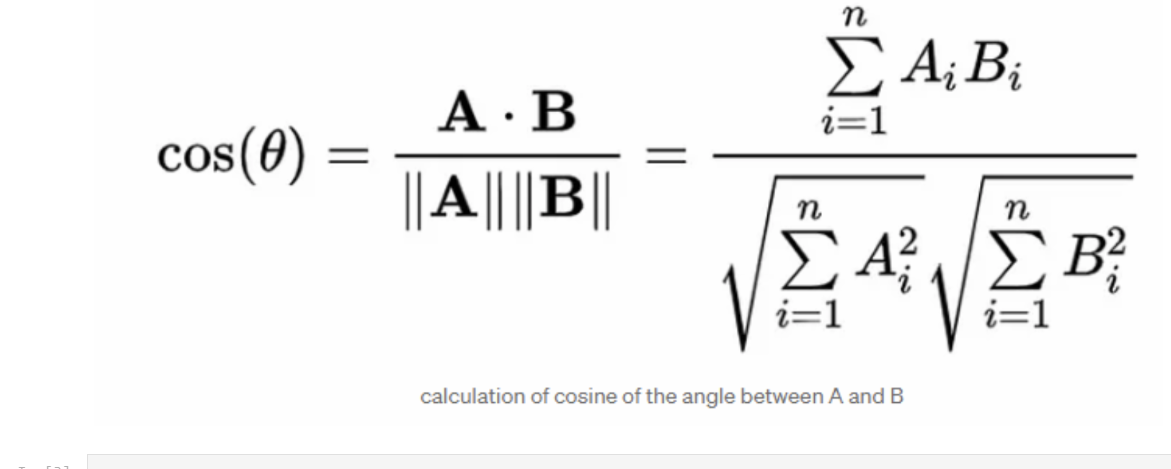

In [28]:
similarity=(dot_prod)/(query_magnitude*document_magnitude)

In [29]:
similarity*100

17.407765595569785

In [30]:
user_query

'i am an indian and i live in india'

In [31]:
document

'india is a country for the indians and for everyone'

In [32]:
def cosine_similarity(query, document):
    # Tokenize and convert to lowercase
    query_tokens = query.lower().split(" ")
    document_tokens = document.lower().split(" ")

    # Create Counters for query and document
    query_counter = Counter(query_tokens)
    document_counter = Counter(document_tokens)

    # Calculate dot product
    dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

    # Calculate magnitudes
    query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
    document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

    # Calculate cosine similarity
    similarity = dot_product / (query_magnitude * document_magnitude) if query_magnitude * document_magnitude != 0 else 0

    return similarity

In [34]:
(cosine_similarity(user_query, document))*100

17.407765595569785

In [35]:
def return_response(query,corpus):
  similarities = []
  for document in corpus:
    similarities.append(cosine_similarity(query,document))
  return corpus_of_documents[similarities.index(max(similarities))]




In [36]:
corpus_of_documents

['Take a leisurely walk in the park and enjoy the fresh air.',
 'Visit a local museum and discover something new.',
 'Attend a live music concert and feel the rhythm.',
 'Go for a hike and admire the natural scenery.',
 'Have a picnic with friends and share some laughs.',
 'Explore a new cuisine by dining at an ethnic restaurant.',
 'Take a yoga class and stretch your body and mind.',
 'Join a local sports league and enjoy some friendly competition.',
 "Attend a workshop or lecture on a topic you're interested in.",
 'Visit an amusement park and ride the roller coasters.']

In [37]:
user_input="i like fresh air."

In [38]:
return_response(user_input,corpus_of_documents)

'Take a leisurely walk in the park and enjoy the fresh air.'

In [39]:
user_input2="i like to do yoga"

In [40]:
return_response(user_input2,corpus_of_documents)

'Take a yoga class and stretch your body and mind.'

In [41]:
user_input3="Would you prefer an adrenaline rush at an amusement park or a calming hike in nature?"

In [46]:
return_response(user_input3,corpus_of_documents)

'Visit an amusement park and ride the roller coasters.'

In [44]:
mylist=[0.1888223650461363,
 0.08333333333333333,
 0.07856742013183861,
 0.15713484026367722,
 0.07856742013183861,
 0.29814239699997197,
 0.06804138174397717,
 0.07453559924999299,
 0.19611613513818407,
 0.31426968052735443]

In [45]:
sorted(mylist)[::-1][:3]

[0.31426968052735443, 0.29814239699997197, 0.19611613513818407]

In [47]:
import numpy as np
(np.argsort(mylist))

array([6, 7, 2, 4, 1, 3, 0, 8, 5, 9])

In [ ]:
mylist.index(sorted(mylist)[::-1][:3])

In [49]:
user_input="Are you more inclined to explore something new by visiting a local museum or dining at an ethnic restaurant?"

In [50]:
relevant_document=return_response(user_input,corpus_of_documents)

In [51]:
prompt = f"""
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

In [52]:
print(prompt)


You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: Explore a new cuisine by dining at an ethnic restaurant.
The user input is: Are you more inclined to explore something new by visiting a local museum or dining at an ethnic restaurant?
Compile a recommendation to the user based on the recommended activity and the user input.



In [53]:
import os
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY


In [54]:
!pip install langchain_google_genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.2/374.2 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 11.0 MB/s eta 0:00:00


In [55]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [56]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [57]:
llm.invoke(prompt).content

'Try the ethnic restaurant.  You can explore new cuisines. \n'

In [58]:
llm.invoke(prompt).content

'Try the ethnic restaurant.  You might discover your new favorite food. \n'